In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/kaggle"

In [3]:
%cd "/content/drive/MyDrive/kaggle"

/content/drive/MyDrive/kaggle


In [4]:
!kaggle datasets download -d koryakinp/chess-positions

100% 4.00G/4.01G [01:43<00:00, 76.8MB/s]
100% 4.01G/4.01G [01:43<00:00, 41.7MB/s]


In [ ]:
!unzip  \*.zip  &&  rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/R1K3k1-1R6-4N1n1-8-b2Q4-5b2-p2R2q1-8.jpeg  
  inflating: train/R1K3k1-8-8-8-4pRp1-4B3-P7-3N4.jpeg  
  inflating: train/R1K4R-5P1R-8-N3Q2k-2p1br2-1P6-1b5N-8.jpeg  
  inflating: train/R1K4b-1B6-b3k3-N7-2n1r3-6p1-p2B4-8.jpeg  
  inflating: train/R1K4n-4P3-6P1-p2k4-8-8-P3P3-8.jpeg  
  inflating: train/R1K5-1q2b3-6p1-8-1B6-5Rq1-8-3r1k2.jpeg  
  inflating: train/R1K5-2n5-P7-3p2B1-8-7p-7Q-6k1.jpeg  
  inflating: train/R1K5-2n5-R7-1p2B3-5b1r-B4k2-8-4r3.jpeg  
  inflating: train/R1K5-3N1P1N-n2b1B2-2k5-5B2-r7-1n6-2N4Q.jpeg  
  inflating: train/R1K5-3N4-4n3-8-6nB-2k5-5P2-8.jpeg  
  inflating: train/R1K5-3Q4-4p2q-p7-B1pR2p1-8-7k-2q5.jpeg  
  inflating: train/R1K5-3p1p2-3n4-1p2b3-3Q4-n1b2q2-4pR2-2k4B.jpeg  
  inflating: train/R1K5-4p3-4n1N1-7R-6P1-1Pq1N2R-8-4kB2.jpeg  
  inflating: train/R1K5-7R-3P4-3p2k1-4n2p-1p3R2-B3B1Q1-3QR3.jpeg  
  inflating: train/R1K5-7k-8-2NqN1n1-8-3p4-n3p3-7N.jpeg  
  inflating: train/R1K5-7p-1N1n4-5k2-2

In [24]:
test = "/content/drive/MyDrive/kaggle"

In [26]:
test = train

In [27]:
import glob
import tensorflow as tf
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [38]:
test = "/content/drive/MyDrive/kaggle/train"

In [39]:
test 

'/content/drive/MyDrive/kaggle/train'

In [51]:
test=glob.glob("/content/drive/MyDrive/kaggle/test/*.jpeg")

In [52]:
print(len(test))

20000


35


Text(0.5, 1.0, 'After Filter')

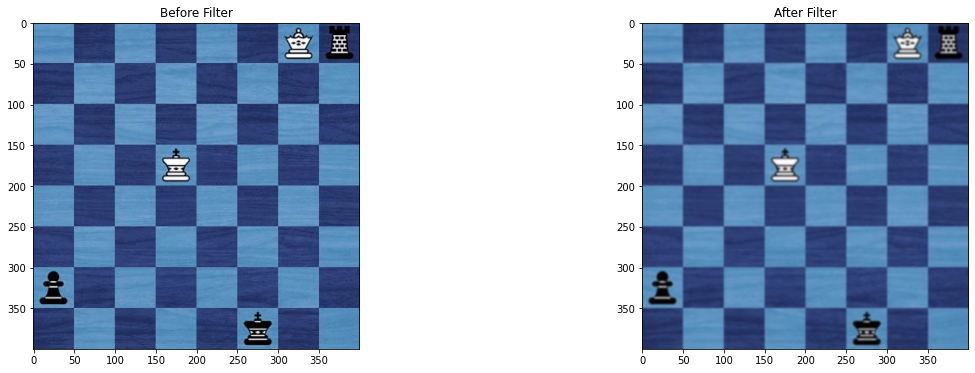

In [53]:

image = cv2.imread(test[10000])
blur = cv2.GaussianBlur(image,(5,5),0)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
axs[0].imshow(image)
axs[0].set_title('Before Filter')
axs[1].imshow(blur)
axs[1].set_title('After Filter')

Text(0.5, 1.0, 'After Equalization')

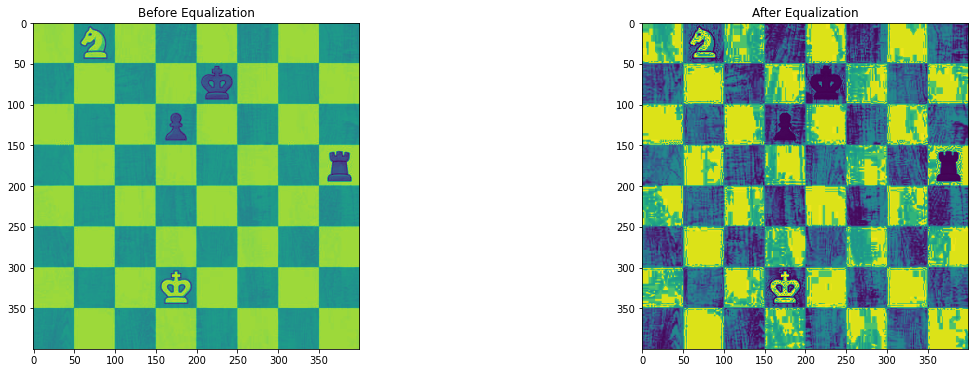

In [55]:
img = cv2.imread(test[1000], cv2.IMREAD_GRAYSCALE)
equalized_image = cv2.equalizeHist(img)
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
axs[0].imshow(img)
axs[0].set_title('Before Equalization')
axs[1].imshow(equalized_image)
axs[1].set_title('After Equalization')

**Feature Engineering**


*   Detect Squres in the Chess Board using Hough Line Transform
*   Break board into 64 pieces 

Text(0.5, 1.0, 'After Detecting Squares')

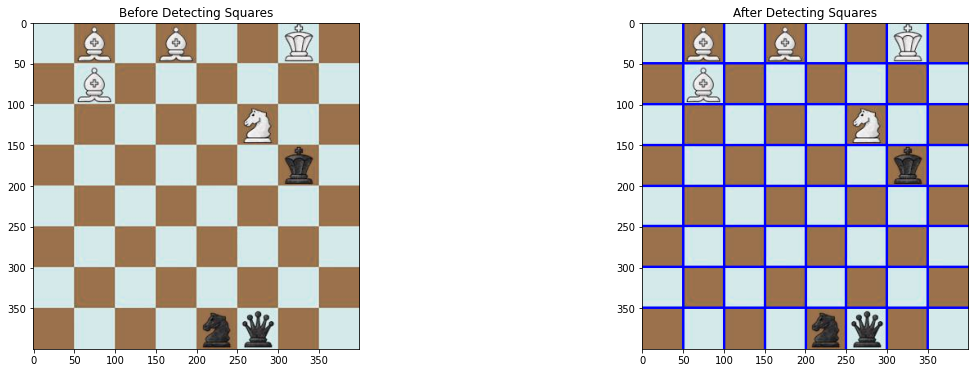

In [57]:
img_original = cv2.imread(test[0])
img = cv2.imread(test[0])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

fig, axs = plt.subplots(1, 2, figsize=(20, 6))
axs[0].imshow(img_original)
axs[0].set_title('Before Detecting Squares')
axs[1].imshow(img)
axs[1].set_title('After Detecting Squares')

In [58]:
mapping_dict = {
    "k": 1,
    "q": 2,
    "r": 3,
    "n": 4,
    "b": 5,
    "p": 6
}

dict_mapping = {
    1: "k",
    2: "q",
    3: "r",
    4: "n",
    5: "b",
    6: "p"
}

def encode_fen(fen):
    y = []
    fen = fen.replace("-", "")
    for char in fen:
        if char.isalpha():
            y.append(mapping_dict[char.lower()] + 6 if char.isupper() else mapping_dict[char])
        else:
            y.extend(np.zeros(int(char), np.int16).tolist())
    return y

def process_image(img):
    IMG_SIZE = 200
    new_array = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    new_array = cv2.equalizeHist(new_array)
    new_array = cv2.equalizeHist(new_array)
    return new_array.reshape(IMG_SIZE, IMG_SIZE, 1)

def pre_process(data):
  x = []
  y = []
  for index, image in enumerate(data):
    if index == 2000:break
    x.append(process_image(cv2.imread(image,cv2.IMREAD_GRAYSCALE)))
    y.append(encode_fen(os.path.basename(image).split(".")[0]))
  return x, y

In [60]:
X, Y = pre_process(test)
X = np.array(X)
Y = np.array(Y)
X = X / 255.0

Dimension reductionality using PCA

In [61]:
X_flat = np.array(X).reshape(2000, 200*200)
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.33, random_state=42)
print(X_flat.shape)

(2000, 40000)


In [62]:
pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
print(d)

629


In [63]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
print(X_reduced.shape)

(1340, 629)



train model

In [65]:
model_flatten = tf.keras.models.Sequential(
    [
     tf.keras.Input(shape=(629,)),
     tf.keras.layers.Dense(128, activation=tf.nn.relu), 
     tf.keras.layers.Dense(64, activation=tf.nn.softmax)
     ])
model_flatten.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model_flatten.fit(X_reduced, y_train, epochs=10)

Epoch 1/10
42/42 [==============================] - 1s 5ms/step - loss: 382.5694 - accuracy: 0.0209
Epoch 2/10
42/42 [==============================] - 0s 4ms/step - loss: 405.9305 - accuracy: 0.0522
Epoch 3/10
42/42 [==============================] - 0s 4ms/step - loss: 524.9487 - accuracy: 0.0791
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 750.0512 - accuracy: 0.0955
Epoch 5/10
42/42 [==============================] - 0s 4ms/step - loss: 1095.4741 - accuracy: 0.1082
Epoch 6/10
42/42 [==============================] - 0s 3ms/step - loss: 1593.5569 - accuracy: 0.1067
Epoch 7/10
42/42 [==============================] - 0s 4ms/step - loss: 2235.8469 - accuracy: 0.1075
Epoch 8/10
42/42 [==============================] - 0s 3ms/step - loss: 3026.9602 - accuracy: 0.1075
Epoch 9/10
42/42 [==============================] - 0s 3ms/step - loss: 3945.4292 - accuracy: 0.1075
Epoch 10/10
42/42 [==============================] - 0s 4ms/step - loss: 5030.5840 - accuracy: 

In [66]:
model_flatten.evaluate(pca.fit_transform(X_test), y_test)

21/21 [==============================] - 0s 2ms/step - loss: 5366.4316 - accuracy: 0.0955


[5366.431640625, 0.09545454382896423]

In [67]:
model_flatten.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               80640     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
Total params: 88,896
Trainable params: 88,896
Non-trainable params: 0
_________________________________________________________________


In [68]:
X = np.array(X)
Y = np.array(Y)
X = X / 255.0
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

Convolutional Neural Network

In [70]:
model = tf.keras.models.Sequential(
    [tf.keras.layers.Conv2D(32, 3, padding='same',activation='relu',input_shape=(200, 200, 1)),
     tf.keras.layers.MaxPool2D(2,2),
     tf.keras.layers.Conv2D(64, 3, padding='same',activation='relu'),
     tf.keras.layers.Conv2D(64, 3, padding='same',activation='relu'),
     tf.keras.layers.MaxPool2D(2,2),
     tf.keras.layers.Conv2D(64, 3, padding='same',activation='relu'),
     tf.keras.layers.Conv2D(64, 3, padding='same',activation='relu'),
     tf.keras.layers.MaxPool2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(100, activation=tf.nn.relu), 
     tf.keras.layers.Dense(64, activation=tf.nn.softmax)
     ])
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=2)

Epoch 1/2
42/42 [==============================] - 275s 7s/step - loss: 16396791.0000 - accuracy: 0.1052
Epoch 2/2
42/42 [==============================] - 305s 7s/step - loss: 15806355456.0000 - accuracy: 0.1075


In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 200, 200, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 64)       

In [72]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 33s 2s/step - loss: 90898964480.0000 - accuracy: 0.0955


[90898964480.0, 0.09545454382896423]

In [73]:
y_pred = model.predict(X_test).astype(np.int)
# tf.math.confusion_matrix(
#     y_pred, y_test
# )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Save-model

In [76]:
model.save('chess_prediction.h5')

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 200, 200, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 50, 50, 64)       